In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from importlib import reload
import sys 
import pandas as pd
import numpy as np
import sys 
sys.path.append('/Users/Santiago PC/Documents/Photometry/Quarter1/time_triggered_average/')
import photometry_3
import time_triggered_average
get_ipython().magic('matplotlib qt5')
import matplotlib.pyplot as plt
import scipy.ndimage

In [2]:
def plot_averages(df, channel_to_align, Fs,  x_lims_list, y_lims_list):
    
    time_base = np.divide(df.index.values, Fs)
    
    plt.subplot(3,1,1)
    plt.plot(time_base, df[channel_to_align], 'b')
    plt.xlabel('time (seconds)')
    plt.ylabel(channel_to_align)
    plt.ylim(y_lims_list[0][0], y_lims_list[0][1])
    #plt.xlim(50000, 150000)
    plt.subplot(3,1,2)
    plt.plot(time_base, df['channel_1_demod_F_F0'], 'g')
    plt.xlabel('time (seconds)')
    plt.ylabel('F/F0 488')
    plt.ylim(y_lims_list[1][0], y_lims_list[1][1])
    #plt.xlim(50000, 150000)
    plt.subplot(3,1,3)
    plt.plot(time_base, df['channel_2_demod_F_F0'])
    plt.xlabel('time (seconds)')
    plt.ylabel('F/F0 405')
    plt.ylim(y_lims_list[2][0], y_lims_list[2][1])
    #plt.xlim(50000, 150000)
    plt.show()
    return(True)

def plot_individual_events(df, channel_to_align, Fs,  x_lims_list, y_lims_list):
    
    time_base = np.divide(df.index.values, Fs)
    
    plt.subplot(2,1,1)
    for event in df[channel_to_align].columns:   
        plt.plot(df[channel_to_align][event])
    plt.xlabel('time (seconds)')
    plt.ylabel(channel_to_align)
    plt.ylim(y_lims_list[0][0], y_lims_list[0][1])
    #plt.xlim(50000, 150000)
    plt.subplot(2,1,2)
    for event in df['channel_1_demod_F_F0'].columns:   
        plt.plot(df['channel_1_demod_F_F0'][event])
    plt.xlabel('time (seconds)')
    plt.ylabel('F/F0 488')
    plt.ylim(y_lims_list[1][0], y_lims_list[1][1])
    plt.show()
    return(True)

In [89]:
reload(photometry_3)
reload(time_triggered_average)

<module 'time_triggered_average' from '/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/photometry_analysis_sc/photometry_analysis/time_triggered_average.py'>

In [80]:
directory = '/Users/johnmarshall/Documents/Analysis/PhotometryData/2019/07102019/SC_analysis/'
f_name = '19710002_F_F0behavior_added.h5'
df_from_file = photometry_3.photometry_df_from_file(directory + f_name)
channel_to_align = 'Digging Manual'

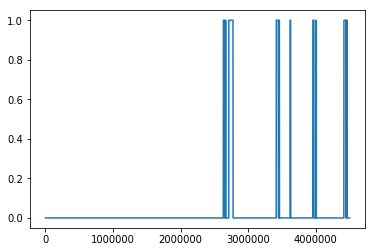

In [81]:
plt.plot(df_from_file.class_df[channel_to_align].values)
plt.show()

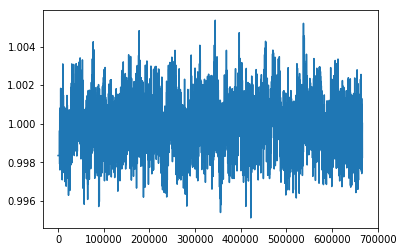

In [82]:
plt.plot(df_from_file.class_df.loc['sweep001']['channel_1_demod_F_F0'].values)
plt.show()

In [83]:
#df_from_file.class_df
#display spreadsheet w data

In [90]:
if channel_to_align == 'Acceleration':
    mean_=np.nanmean(df_from_file.class_df[channel_to_align].values)
    std_=np.nanstd(df_from_file.class_df[channel_to_align].values)
    threshold = mean_ + 4*std_
    print(mean_)
    print(std_)
    print(threshold)
    time_threshold = 0
    
if channel_to_align == 'Digging Manual':
    threshold = 0.5
    time_threshold = 1

In [91]:
# return regions in traces "triggered" around an amplitude threshold in a given trace 
regions = time_triggered_average.align_on_trigger(df_from_file.class_df, 10000, 
                                                     channel_to_align, 
                                                     ['channel_1_demod_F_F0', 'channel_2_demod_F_F0'],
                                                     threshold, 'up', 
                                                     time_threshold, 
                                                     5, (0, 0))

In [92]:
list(regions.values())[0].columns.values[0]

464621

In [93]:
#average the triggered regions across channels
unsorted_regions = time_triggered_average.return_events(regions)
unsorted_regions_mean = unsorted_regions.mean(axis=1, level=0)

In [94]:
unsorted_regions['Digging Manual'].columns

MultiIndex(levels=[['sweep005', 'sweep008', 'sweep007', 'sweep006'], [45952, 80634, 413928, 464621, 620951]],
           labels=[[0, 1, 2, 2, 3], [3, 2, 1, 4, 0]])

In [95]:
unsorted_regions['Digging Manual'].head()

sweep005 sweep008 sweep007        sweep006
    464621   413928   80634  620951   45952 
0        0        0        0      0        0
1        0        0        0      0        0
2        0        0        0      0        0
3        0        0        0      0        0
4        0        0        0      0        0

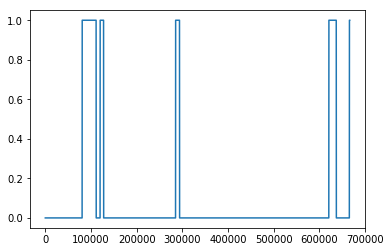

In [112]:
plt.plot(df_from_file.class_df.loc['sweep007']['Digging Manual'].values)

In [113]:
#if checking later
#df_from_file = pd.read_hdf(directory+'19710002_F_F0behavior_addedDiggingunsorted.h5')

In [114]:
#in tandem with the cell from above
#unsorted_regions = df_from_file

In [119]:
unsorted_regions['channel_1_demod_F_F0'].mean(axis=1)

0        0.999662
1        0.999664
2        0.999666
3        0.999668
4        0.999670
5        0.999672
6        0.999674
7        0.999676
8        0.999679
9        0.999681
10       0.999684
11       0.999686
12       0.999689
13       0.999692
14       0.999695
15       0.999698
16       0.999702
17       0.999705
18       0.999709
19       0.999712
20       0.999716
21       0.999720
22       0.999724
23       0.999729
24       0.999733
25       0.999738
26       0.999743
27       0.999748
28       0.999753
29       0.999758
           ...   
39970    0.999564
39971    0.999567
39972    0.999571
39973    0.999575
39974    0.999579
39975    0.999584
39976    0.999588
39977    0.999594
39978    0.999599
39979    0.999605
39980    0.999611
39981    0.999617
39982    0.999624
39983    0.999631
39984    0.999638
39985    0.999645
39986    0.999653
39987    0.999660
39988    0.999668
39989    0.999677
39990    0.999685
39991    0.999693
39992    0.999702
39993    0.999711
39994    0

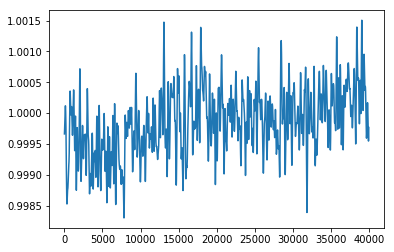

In [120]:
plt.plot(unsorted_regions['channel_1_demod_F_F0'].mean(axis=1))
plt.show()

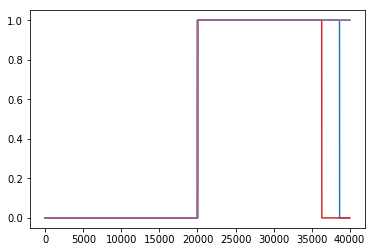

In [116]:
plt.plot(unsorted_regions['Digging Manual'])
plt.show()

In [ ]:
#sort events by additional criteria 
sorted_events, means_by_channel = time_triggered_average.return_sorted_events(unsorted_regions, channel_to_align , 'before', threshold, 40000)

In [ ]:
#save results to hdf file 
unsorted_regions.to_hdf(directory + f_name.rstrip('.h5') + channel_to_align + 'unsorted.h5', key='df', format='table')
sorted_events.to_hdf(directory + f_name.rstrip('.h5') + channel_to_align + 'sorted_before.h5', key='df')
means_by_channel.to_hdf(directory + f_name.rstrip('.h5') + channel_to_align + 'sorted_means_before.h5', key='df')

In [ ]:
#plot average trace from sorted regions 
df_from_file.Fs
plot_averages(means_by_channel, channel_to_align, df_from_file.Fs, [(),(),()], [(-.1, 1.2),(.98, 1.01),(.98, 1.025)])

In [ ]:
plt.subplot(2,1,1)
plt.plot(unsorted_regions['Grooming'])
plt.subplot(2,1,2)
plt.plot(unsorted_regions['channel_1_demod_F_F0'])
plt.show()

In [ ]:
unsorted_regions['channel_1_demod_F_F0'].loc[50000:60000].max().values

In [ ]:
max_during_grooming = unsorted_regions['channel_1_demod_F_F0'].loc[50000:60000].max().values

In [ ]:
max_before_grooming = unsorted_regions['channel_1_demod_F_F0'].loc[40000:50000].max().values

In [ ]:
plt.scatter(np.ones(len(max_during_grooming)), max_during_grooming)

In [ ]:
plt.scatter(np.ones(len(max_before_grooming)), max_before_grooming)

In [ ]:
max_before_grooming.max()

In [ ]:
max_during_grooming.max()

In [ ]:
plt.hist([max_before_grooming, max_during_grooming])
plt.show()
plt.suptitle('AAV_Synflex_004 D1')
plt.xlabel('Fluoresence')
plt.ylabel('Frequency')

In [ ]:
max_before = [1.011622661,1.028583386]
max_during = [1.014063491,1.025865516]

In [ ]:
unsorted_regions['channel_1_demod_F_F0'].loc[50000:60000].max()

In [ ]:
#plot individual traces of sorted events
plot_individual_events(sorted_events, channel_to_align, df_from_file.Fs, [(),(),()], [(-.1, 1.2),(.98, 1.025),(.98, 1.025)])

In [ ]:
#get peak of events in individual traces
peak_df = pd.DataFrame(sorted_events[30000:50000].max(axis=0), columns = ['peak amplitude']).transpose()

In [ ]:
#calculate latency to peak 
latency_samples_of_peak_df = pd.DataFrame(sorted_events[30000:50000].idxmax(axis=0), columns = ['peak latency']).transpose()
#convert to seconds
time_of_peak_df = latency_samples_of_peak_df.apply(lambda x: (50001-x)/df_from_file.Fs)

In [ ]:
# fiter photometry signal but leave behavior channels 
dfs = []
names = []
for channel in ['channel_1_demod_F_F0', 'channel_2_demod_F_F0']:
    by_channel = {}
    for event in sorted_events['channel_1_demod_F_F0'].columns.values:
        by_channel[event] = sorted_events[channel][event].apply((lambda x: photometry_3.gaussian_filter_signal(x, 200)))
    dfs.append(pd.DataFrame(by_channel))
    names.append(channel)

dfs.append(sorted_events['Acceleration'])
names.append('Acceleration')

filt_df = pd.concat(dfs, keys=names, axis=1)

In [ ]:
plot_individual_events(filt_df, channel_to_align, df_from_file.Fs, [(),(),()], [(-.1, 2000),(.90, 1.05),(.95, 1.05)])

In [ ]:
dfs_output = pd.concat([peak_df, time_of_peak_df])

In [ ]:
dfs_output

In [ ]:
plt.scatter(dfs_output['channel_1_demod_F_F0'].loc['peak latency'].values, dfs_output[channel_to_align].loc['peak amplitude'].values)

In [ ]:

dfs_output.to_hdf(directory+f_name.rstrip('behavior_added.h5')+'_'+str(channel_to_align)+'_bouts_sorted_before_peak.h5', key='df')

In [ ]:
#for grooming analysis
# does the peak F_F0 proximal to grooming onset correlate with bout length

# get bout lengths
df = sorted_events
bout_lengths = {}
for index in df[channel_to_align].columns:  
    out = time_triggered_average.measure_bout_lengths(df[channel_to_align][index], start_index=40000, threshold=.5)
    if out[0][0] == int(len(df[channel_to_align][index])/2)+1:
        bout_lengths[index] = out[1][0]
#list(bout_lengths.items())

In [ ]:
# from bout length dictionary get the peak in the F_F0 trace 
F_F0_peaks = {}
for item in list(bout_lengths.items()):
    print(item)
    middle_index = int(len(df['channel_1_demod_F_F0'][item[0]])/2)
    start_index = middle_index - 30000
    signal_filt = photometry_3.gaussian_filter_signal(df['channel_1_demod_F_F0'][item[0]][start_index:(middle_index+item[1])], 200)
    F_F0_peaks[item[0]] = np.max(signal_filt)
    plt.plot(signal_filt)
plt.show()


df_out = pd.concat([pd.DataFrame(list(bout_lengths.values()), index=list(bout_lengths.keys()), columns=['bout_lengths_samples']),
          pd.DataFrame(list(F_F0_peaks.values()), index=list(F_F0_peaks.keys()), columns=['channel_1_F_F0_peak'])], axis=1)

In [ ]:
df_out.plot.scatter('channel_1_F_F0_peak', 'bout_lengths_samples', title='Mouse: AAV_SYN_005 File: ' + f_name.rstrip('behavior_added.h5'))

In [ ]:
# renormalize to a baseline before grooming onset
re_normed_traces = {}
F_F0_peaks_normed_before_onset = {}
for item in list(bout_lengths.items()):
    print(item)
    middle_index = int(len(df['channel_1_demod_F_F0'][item[0]])/2)
    start_index = middle_index-30000
    signal_filt = photometry_3.gaussian_filter_signal(df['channel_1_demod_F_F0'][item[0]][start_index:(middle_index+item[1])], 200)
    
    signal_filt_normed = np.array([((sample-np.mean(signal_filt[0:10000]))/np.mean(signal_filt[0:10000])) for sample in signal_filt])
    
    F_F0_peaks_normed_before_onset[item[0]] = np.max(signal_filt_normed)
    to_pad = 80000-len(signal_filt)
    re_normed_traces[item[0]] = np.pad(signal_filt_normed,(0,to_pad), 'constant', constant_values=np.nan)
    plt.plot(signal_filt_normed)
plt.show()

df_out = pd.concat([pd.DataFrame(list(bout_lengths.values()), index=list(bout_lengths.keys()), columns=['bout_lengths_samples']),
         pd.DataFrame(list(F_F0_peaks.values()), index=list(F_F0_peaks.keys()), columns=['channel_1_F_F0_peak']),
         pd.DataFrame(list(F_F0_peaks_normed_before_onset.values()), index=list(F_F0_peaks_normed_before_onset.keys()), columns=['channel_1_F_F0_peak_normed'])],
                   axis=1
                  )

In [ ]:
df_traces = pd.DataFrame(re_normed_traces, index=np.linspace(0, len(list(re_normed_traces.items())[0][1]), len(list(re_normed_traces.items())[0][1])))

In [ ]:
plt.plot(df_traces.mean(axis=1))
plt.show()

In [ ]:
df_out.plot.scatter('channel_1_F_F0_peak_normed', 'bout_lengths_samples', title='Mouse: AAV_SYN_004 File: ' + f_name.rstrip('behavior_added.h5'))

In [ ]:
df_out.to_hdf(directory+f_name.rstrip('behavior_added.h5')+'grooming_bouts_sorted_for_plotting.h5', key='df')

In [ ]:
df_out